<a href="https://colab.research.google.com/github/toche7/mdsLab5/blob/main/Colab7_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab. 7 Model Development

ขั้นตอนในการทำพัฒนาแบบจำลองสามารถแบ่งได้ 2 ขั้นตอนดังนี้

1. ขั้นตอนการประเมินแบบจำลอง \(Model Validation\)
2. ขั้นตอนการคัดเลือกแบบจำลอง \(Model Selection\)



## 7.1 Model Validation

ในการประเมินแบบจำลอง หมายถึงกระบวนการในการวัดประสิทธิภาพของแบบจำลอง เพื่อที่จะใช้ในกระบวนการคัดเลือกหรือเปรียบเทียบประสิทธิภาพระหว่างแบบจำลองซึ่งสามารถทำได้สองวิธีดังนี้

1. Hold\-Out Method
2. Cross\-Validation Method

https://scikit-learn.org/stable/modules/cross_validation.html


### 7.1.1 Hold\-Out Method



![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*iZpmWiVeFn0bcuMZ_yiEdw.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#




```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

```




ตัวแปรสำคัญในการใช้คำสั่ง
* *arrarys: ข้อมูลที่ใช้ในการแบ่งสามารถใส่เข้ามาหลายๆ ชุดพร้อมกัน ได้
* test_size: float หรือ int, default = None, ถ้าเป็น 0.0-1 ก็จะทำการแบ่งข้อมูลไปตามขนาดสัดส่วนของ test_size และส่วนที่เหลือจะไปเป็น train set ถ้าเป็นจำนวนเต็มก็จะหมายถึงค่าจำนวนข้อมูลที่จะแบ่งไป   แต่ถ้าเป็น None ก็จะกำหนดให้กำหนดเป็น 0.25
* train_size: float หรือ int, default = None, จะเป็นข้อมูลส่วนจะนำไปฝึกแบบจำลอง โดยจะเป็นแบ่งตามค่า float ที่กำหนด ถ้าเป็นเลขจำนวนเต็มก็จะกำหนดค่าตามนั้น ถ้าเป็น none ก็จะใช้ส่วนที่เหลือจาก test set มาใช้
* random_state: int, default = None, กำหนดค่า seed ให้กับตัวกำสร้าง random โดยค่านี้จะถูกใช้ในการทำ  shuffle ข้อมูลที่จะทำก่อนการแบ่ง


โดยจะส่งค่ากลับมา list ที่แบ่งออกเป็นสองส่วนแล้ว

### Example 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
list(y)

[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.33, random_state=42)

### Example 2

* "from" จะให้กำหนดเป้าหมายในการดึง module ออกมา
* "import" เป็นนำเข้า model เข้ามา
* "as" เป็นการตั้งชื่อเล่น เพื่อจะเรียกให้ง่ายขึ้น


``` python
import sklearn as sk
from sklearn.model_selection import train_test_split as tt
```



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
Acc = clf.score(X_test, y_test)

print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
print('Acc: %.4f' % Acc )

size X_train:  (105, 4)
size X_test:  (45, 4)
Acc: 1.0000


#### ผลกระทบของการ random state และขนาดของการแบ่งข้อมูล

In [ ]:
n = 10
size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
  clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
  Acc = clf.score(X_test, y_test)
  print('Acc: %.4f' % Acc )


size X_train:  (135, 4)
size X_test:  (15, 4)
Acc: 0.9333
Acc: 1.0000
Acc: 0.9333
Acc: 0.8667
Acc: 1.0000
Acc: 0.9333
Acc: 0.9333
Acc: 1.0000
Acc: 1.0000


#### ทดลอง
ทดลองปรับค่า  test_size ไปเป็น ค่าอื่น เช่น 0.3, 0.2, 0.1 และทดลองปรับค่า random_state = None'

### 7.1.2 Cross\-Validation Method



![](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html




``` python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelObject, X, y, cv= 5, scoring = 'f1_macro')
```



ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross validatoin โดยสามารถดูได้จาก  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Example 3

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)


In [ ]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


ทดลองเปลี่ยนค่า scoring

In [ ]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')  # defined the score types
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

#### ทดลอง
ทดลองปรับค่า fold  (cv) ไปเป็น 10 fold ให้  score เป็น ‘precision’  แบบ  micro average แล้วทำการวัดผลอีกครั้ง

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

โดยหลักการแล้วนั้น  Cross\-Validation จะให้ความน่าเชื่อถือมากกว่าการใช้ Hold\-Out Method  ส่วนวิธีการ Hold\-Out Method ก็จะมีข้อดีในเรื่องของความเร็วในการประมวลผล โดยส่วนใหญ่แล้วถ้าการทดสอบไหนที่แบบจำลองมีขนาดใหญ่ หรือปริมาณข้อมูลขนาดใหญ่เราจะนิยมใช้เป็น Hold\-Out Method เช่นงานทางด้าน image processing และ  NLP เป็นต้น  ส่วนการทดลองใดที่สามารถทำได้เร็วก็จะนิยมทำด้วยวิธี Cross\-Validation



## 7.2 Model Selection

ในข้อมูลชุดหนึ่งนั้นเราสามารถที่จะสร้างแบบจำลองได้หลายประเภท โดยในแต่ละประเภทเราสามารถสร้างแบบจำลองที่แตกต่างด้วยการปรับพารามิเตอร์ที่เกี่ยวข้องให้แตกต่างกันออกไป สิ่งที่ได้ก็คือเราจะได้โมเดลที่มีประสิทธิภาพแตกต่างกันหลังจากนั้นเราจะเลือกเอาโมเดลที่มีประสิทธิภาพมากที่สุดไปใช้งาน

Hyperparameter Turing หมายถึงกระบวนการปรับพารามิเตอร์ที่เกี่ยวข้องเพื่อให้ได้ประสิทธิภาพมากที่สุด โดยจะต้องมีการทดสอบพารามิเตอร์ที่แตกต่างกันแล้วเอาค่าที่ดีที่สุดไปใช้งาน

https://scikit-learn.org/stable/modules/grid_search.html

การเลือกแบบจำลองนอกจากจะเลือกจากแบบจำลองชนิดเดียวกันแล้วเรายังจะต้องเปรียบเทียบแบบจำลองที่เป็นคนละชนิดกันโดยจะเปรียบเทียบแบบจำลองที่แตกต่างกันที่มีการเลือกพารามิเตอร์ที่ดีที่สุดออกมาแล้ว

Theory

https://scikit-learn.org/stable/modules/grid_search.html#grid-search


Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV





```python
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(modelObject, parameters, cv = 5)
gridSearch.fit(X, y)

```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X, y \) | Fit the model according to the given training data. |


ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross
* parameters เป็น dictionary ของตัวแปรที่จะนำไปทำการค้นหา

### Example 4
Grid Search Cross-Validation with Support Vector Machine

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y=True)

parameters = {'kernel':['linear', 'rbf'], 'C':[1,2,3,4]}

svc = svm.SVC()

gS = GridSearchCV(svc, parameters, cv = 5, scoring =  None)
gS.fit(X, y)
sorted(gS.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
gS.cv_results_

{'mean_fit_time': array([0.00111279, 0.00147591, 0.0008769 , 0.00093827, 0.00087729,
        0.00094342, 0.0008781 , 0.00093684]),
 'std_fit_time': array([2.46778437e-04, 8.15084586e-04, 3.59004867e-05, 1.54104740e-05,
        1.06394499e-04, 2.55648762e-05, 7.94449916e-05, 6.95840216e-05]),
 'mean_score_time': array([0.00079646, 0.00073051, 0.00061307, 0.00062919, 0.00059056,
        0.00063424, 0.00064654, 0.00063992]),
 'std_score_time': array([2.77789818e-04, 1.27950702e-04, 2.60016640e-05, 1.78352396e-05,
        2.15248540e-05, 1.92002613e-05, 4.77674226e-05, 4.22169226e-05]),
 'param_C': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',

In [ ]:
gS.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
gS.best_score_

0.9800000000000001

In [ ]:
gS.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
gS.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
gS.best_estimator_.score(X,y)

0.9933333333333333

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(0.9, 1.0)

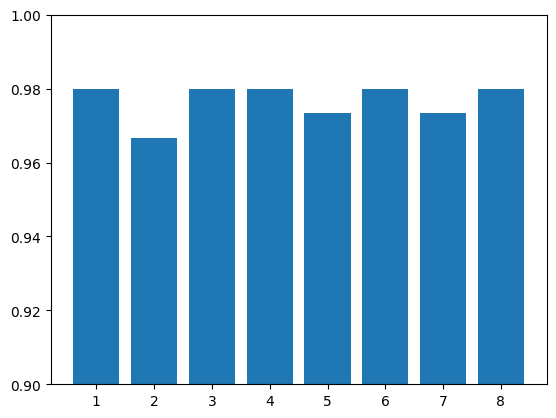

In [ ]:
plt.bar(np.arange(1,9), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

## Example 5

Grid Search Cross-Validation with Decision Tree Model

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y= True)


In [ ]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[2,3,4,5,6,7,8,9,10]}
mTree =  DecisionTreeClassifier()

In [ ]:
gS = GridSearchCV(mTree, parameters, cv = 5)

In [ ]:
gS.fit(X,y)
sorted(gS.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
gS.cv_results_['mean_test_score']

array([0.93333333, 0.96      , 0.96666667, 0.96666667, 0.96      ,
       0.96      , 0.96666667, 0.95333333, 0.96666667, 0.93333333,
       0.96      , 0.95333333, 0.95333333, 0.96      , 0.95333333,
       0.95333333, 0.96      , 0.95333333, 0.93333333, 0.96      ,
       0.95333333, 0.95333333, 0.96      , 0.96      , 0.95333333,
       0.96      , 0.95333333])

In [ ]:
gS.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 4},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 8},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'gini', 'max_depth': 10},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criterion': 'entropy', 'max_depth': 9},
 {'criterion': 'entropy', 'max_depth': 10},
 {'criterion': 'log_loss', 'max_depth': 2},
 {'criterion': 'log_loss', 'max_depth': 3},
 {'criterion': 'log_loss', 'max_depth': 4},
 {'criterion': 'log_loss', 'max_depth': 5},
 {'criterion': 'log_loss', 'max_depth': 6},
 {'criterion': 'log_loss', 'max

In [ ]:
gS.cv_results_['rank_test_score']

array([25, 12,  1,  1,  5,  5,  1, 15,  1, 25, 12, 15, 15,  5, 15, 15,  5,
       15, 25, 12, 15, 15,  5,  5, 15,  5, 15], dtype=int32)

(0.9, 1.0)

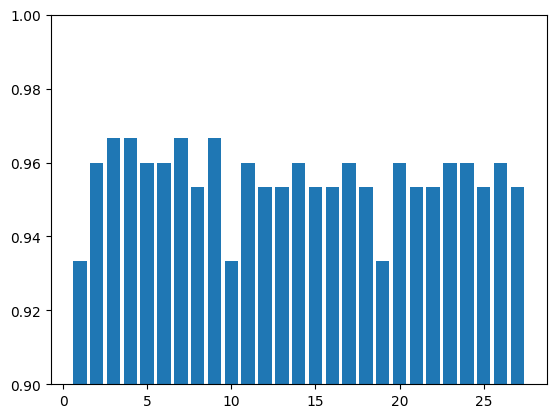

In [ ]:
import matplotlib.pyplot as plt
plt.bar(np.arange(1,28), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

In [ ]:
gS.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [ ]:
gS.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [ ]:
gS.best_score_

0.9666666666666668

In [ ]:
gS.best_estimator_.score(X,y)

0.9933333333333333

#### ตอบคำถาม
จากการทดลองนี้ model ใดดีที่สุด

## Exercise 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

X,y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
mTR = DecisionTreeClassifier()
mNN = MLPClassifier()
mKNN = KNeighborsClassifier()
mSVM = SVC()

In [ ]:
parTR = {'criterion':['gini', 'entropy'], 'max_depth':[2,3,4,5,6,7,8,9,10]}
parSVM = {'kernel':['linear', 'rbf'], 'C':[1,2,3,4]}
parNN = {'hidden_layer_sizes':[(10,),(20,),(30,),(40,)], 'max_iter': [1000]}
parKNN = {'n_neighbors':[2,3,4,5]}

In [ ]:
model = [mTR,mNN,mKNN,mSVM]
para = [parTR,parNN,parKNN,parSVM]
modelName = ['Decision Tree', 'Neural Network', 'KNN', 'SVM']

In [ ]:
m = 4
gSA = [0]*m
for i in range(0, m):
    gSA[i] = GridSearchCV(model[i], para[i], cv = 5)
    gSA[i].fit(X,y);


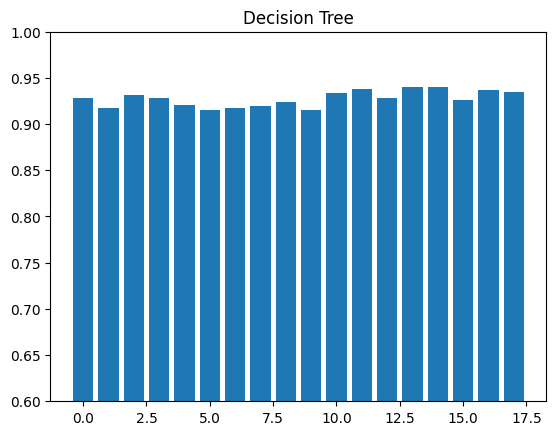

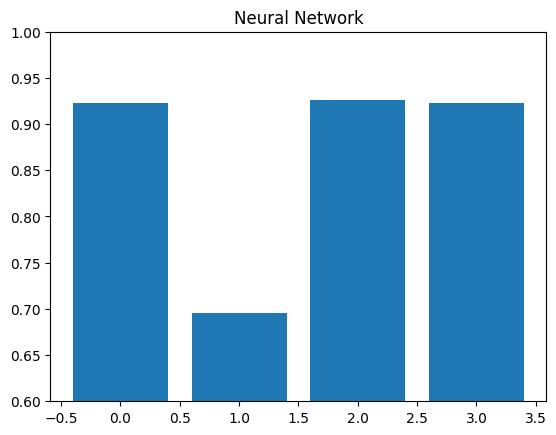

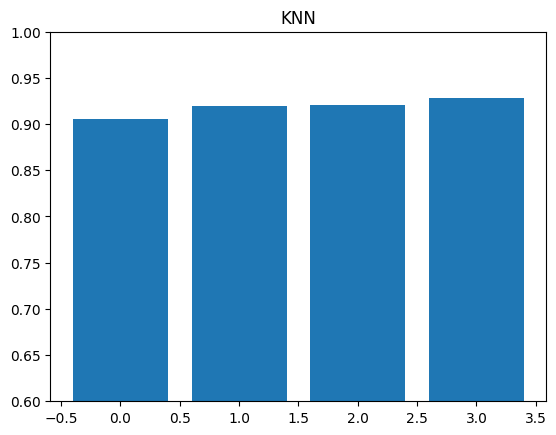

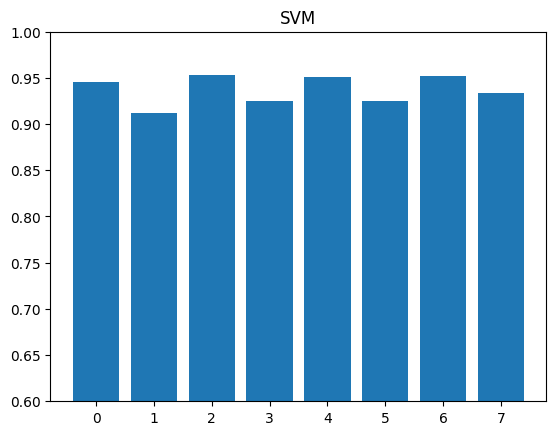

In [ ]:
import matplotlib.pyplot as plt
for i in range(0, m):
    sample = len(gSA[i].cv_results_['mean_test_score'])
    plt.bar(np.arange(0,sample), gSA[i].cv_results_['mean_test_score'])
    plt.ylim(0.6, 1)
    plt.title(modelName[i])
    plt.show()

In [ ]:
for i in range(0, m):
  print(gSA[i].best_score_)

0.9402577239559076
0.9262071106970968
0.9279459711224964
0.952585002328831


In [ ]:
m

4